In [1366]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt

# Statistical Libraries
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from scipy import stats
import statsmodels.api as sm

import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)

# Importing Data


In [1700]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')



# Understanding the Data


In [1701]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


The entire data is split equally into training and test data sets with equal rows in both

In [1702]:
print(train.columns.values)

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

In [1703]:
numeric_columns=(train.iloc[:, (np.where((train.dtypes == np.int64) | 
                 (train.dtypes == np.float64)))[0]].columns)
categorical_columns=(train.iloc[:, (np.where((train.dtypes == object)))[0]].columns)


# Exploratory Data Analysis


Lets see if any of the column have null values.


In [1704]:
print(train.columns[train.isnull().any()].tolist())
print(test.columns[test.isnull().any()].tolist())


['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


The above columns have missing values. We will handle them at a  later stage

Let us see the distribution of sale price in our train data. 


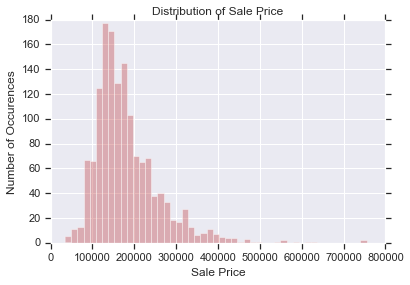

In [1705]:
sns.distplot(train['SalePrice'], color="r", kde=False)
plt.title("Distribution of Sale Price")
plt.ylabel("Number of Occurences")
plt.xlabel("Sale Price");

We can see that sale prices is right skewed, hence lets try using log transformation 

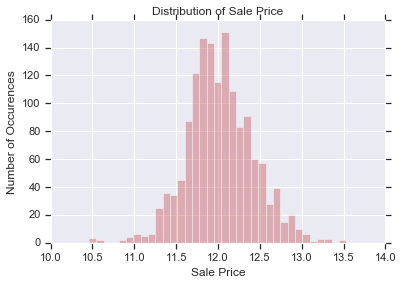

In [1706]:
sns.distplot(np.log(train['SalePrice']), color="r", kde=False)
plt.title("Distribution of Sale Price")
plt.ylabel("Number of Occurences")
plt.xlabel("Sale Price");

train['SalePrice']=np.log(train['SalePrice'])

The distribution of Sale Prices now looks more normal after applying log transformation

Now let's explore each predictor vaiable and it's relationship with the response variable.


## MSSubClass - Identifies the type of dwelling involved in the sale


In [1707]:
train['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40], dtype=int64)

In [1708]:
#The values represent categories but are stored as integers hence converting them into factors
train['MSSubClass'] = train['MSSubClass'].astype('category')

In [1709]:
train['MSSubClass'].isnull().any() 
#No missing values

False

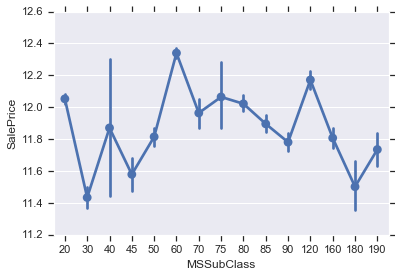

In [1710]:
sns.pointplot(x='MSSubClass', y='SalePrice', data=train)

## MSZoning- Identifies the general zoning classification of the sale.

In [1711]:
train['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [1712]:
train['MSZoning'].isnull().any() 
#No missing values

False

In [1713]:
#The values represent categories but are stored as integers hence converting them into factors
train['MSZoning'] = train['MSZoning'].astype('category')

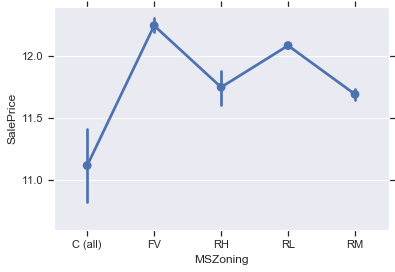

In [1714]:
sns.pointplot(x='MSZoning', y='SalePrice', data=train)

In [1715]:
train = pd.get_dummies(train, columns=['MSZoning'], drop_first=True)
train.shape


(1460, 84)

Zoning has a considerable effect on the sale price. Houses with zones such as floating village residential has the highest sale price followed by residential with low, high and medium density. All the other zones have very less sale price.
Linear feet of street connected to property

## LotFrontage - Linear feet of street connected to property

In [1716]:
train['LotFrontage'].isnull().sum() 
#There are 259 missing values

259

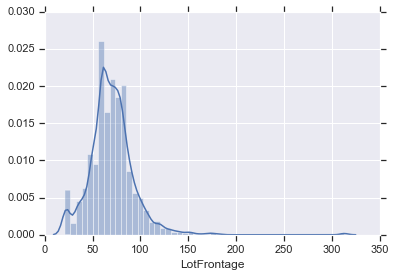

In [1717]:
sns.distplot((train[train['LotFrontage'].notnull()])['LotFrontage'])

In [1718]:
#since the distribution is right skewed we will use median instead of mean to impute the missing values.
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].median())
print(train['LotFrontage'].isnull().sum())

test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].median())
print(test['LotFrontage'].isnull().sum())


0
0


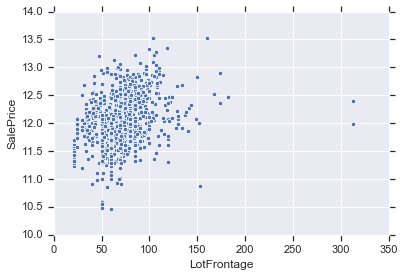

In [1719]:
sns.scatterplot(x='LotFrontage', y='SalePrice', data=train)

As lot frontage increases, sale price also increases. There are two outliers which have very high lot frontage but very little sale price (id-935,1229)

In [1720]:
pearsonr(train['LotFrontage'],train['SalePrice'])
#Positive correlation between sale price and lot frontage

(0.33529150244520672, 1.0848758235643311e-39)

##  LotArea: Lot size in square feet

In [1721]:
train['LotArea'].isnull().sum() 
#There are no missing values

Flushing oldest 200 entries.


0

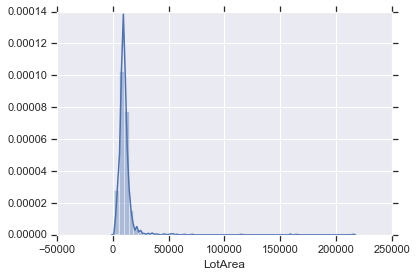

In [1722]:
sns.distplot(train['LotArea'])
#Some houses have extremely large lot area, these need further investigation to check if they are outliers.

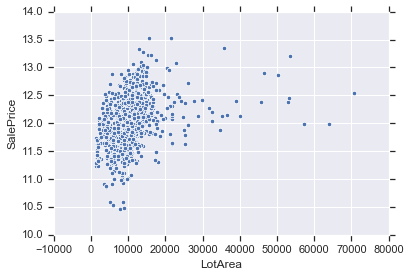

In [1723]:
sns.scatterplot(x='LotArea', y='SalePrice', data=train[train['LotArea']<100000])
#We removed the few houses with lot are greater than 50000, to get a better picture.


In [1724]:
pearsonr(train['LotArea'],train['SalePrice'])
#There is a positive corelation between sale price and LotArea

(0.25731989235273872, 1.6439921367364843e-23)

In [1725]:
train[train['LotArea']>100000]
#There are 4 houses with very high lot area but the sale price is not as high as expected

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
249,250,50,69.0,159000,Pave,NaN,IR2,Low,AllPub,CulDSac,...,500,6,2007,WD,Normal,12.531773,0.0,0.0,1.0,0.0
313,314,20,150.0,215245,Pave,NaN,IR3,Low,AllPub,Inside,...,0,6,2009,WD,Normal,12.834681,0.0,0.0,1.0,0.0
335,336,190,69.0,164660,Grvl,NaN,IR1,HLS,AllPub,Corner,...,700,8,2008,WD,Normal,12.341259,0.0,0.0,1.0,0.0
706,707,20,69.0,115149,Pave,NaN,IR2,Low,AllPub,CulDSac,...,0,6,2007,WD,Normal,12.618182,0.0,0.0,1.0,0.0


## Street: Type of road access to property

In [1726]:
train['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [1727]:
train['Street'].isnull().any() 
#No missing values

False

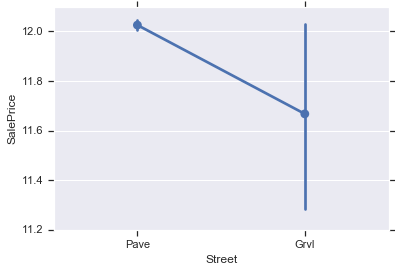

In [1728]:
sns.pointplot(x='Street', y='SalePrice', data=train)
#Properties with a paved road access tend to be sold at a higher price.
#But there are only 6 observations in the training data with a gravel access,so this conclusion might be skewed

In [1729]:
train = pd.get_dummies(train, columns=['Street'], drop_first=True)
train.shape

(1460, 84)

## Alley: Type of alley access to property

In [1730]:
train['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [1731]:
train['Alley'].isnull().sum() 
#This column has 1369 null values
# we will consider null values as there is no alley access to the house

1369

In [1732]:
train['Alley'] = train['Alley'].fillna('None')
print(train['Alley'].isnull().sum())

test['Alley'] = test['Alley'].fillna('None')
print(test['Alley'].isnull().sum())

0
0


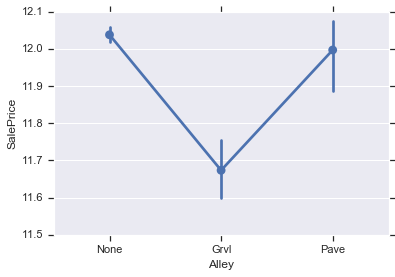

In [1733]:
sns.pointplot(x='Alley', y='SalePrice', data=train)

As expected from the previous case houses with a paved alley access sold at a higher price than gravel access. But surprisingly houses with no alley access are sold for a higher cost than grvl access.

In [1734]:
train = pd.get_dummies(train, columns=['Alley'], drop_first=True)
train.shape


(1460, 85)

## LotShape: General shape of property

In [1735]:
train['LotShape'].unique()
# No missing values

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

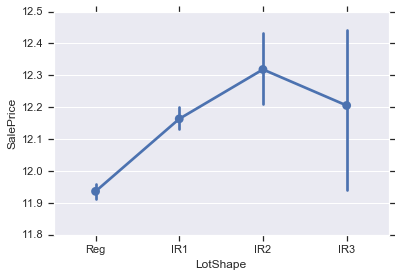

In [1736]:
sns.pointplot(x='LotShape', y='SalePrice', data=train)

Another interesting find. Houses with moderately irregular lot cost more followed by slight and heavily irregular lot shape. Houses with a regular lot shape costed the least.

In [1737]:
train = pd.get_dummies(train, columns=['LotShape'], drop_first=True)
train.shape


(1460, 87)

## LandContour: Flatness of the property



In [1738]:
train['LandContour'].unique()
#No null values

array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)

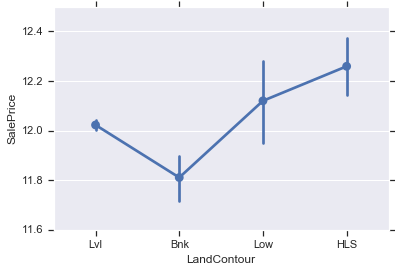

In [1739]:
sns.pointplot(x='LandContour', y='SalePrice', data=train)

Houses with a banked contour are sold at a considerably low price. On the other hand jouses with hill side contour cose more than others.

In [1740]:
train = pd.get_dummies(train, columns=['LandContour'], drop_first=True)
train.shape


(1460, 89)

## Utilities: Type of utilities available

In [1741]:
train['Utilities'].unique()
#No null values

array(['AllPub', 'NoSeWa'], dtype=object)

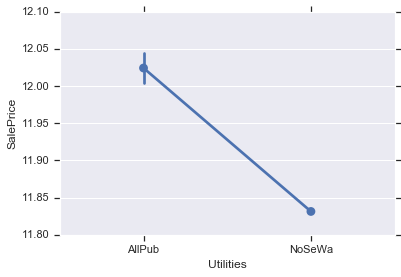

In [1742]:
sns.pointplot(x='Utilities', y='SalePrice', data=train)

Houses with all utilities included are sold for a higher price

In [1743]:
train = pd.get_dummies(train, columns=['Utilities'], drop_first=True)
train.shape


(1460, 89)

## LotConfig: Lot configuration

In [1744]:
train['LotConfig'].unique()
# No null values

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

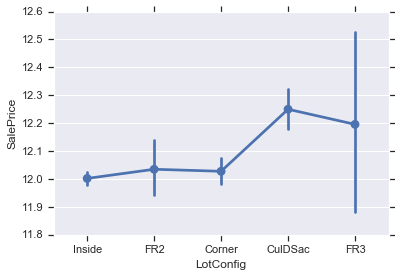

In [1745]:
sns.pointplot(x='LotConfig', y='SalePrice', data=train)

Houses with CuldSac and FR3 have higher costs with little variation between Inside, FR2 and Corner

In [1746]:
train = pd.get_dummies(train, columns=['LotConfig'], drop_first=True)
train.shape


(1460, 92)

## LandSlope: Slope of property

In [1747]:
train['LandSlope'].unique()
# No null values

array(['Gtl', 'Mod', 'Sev'], dtype=object)

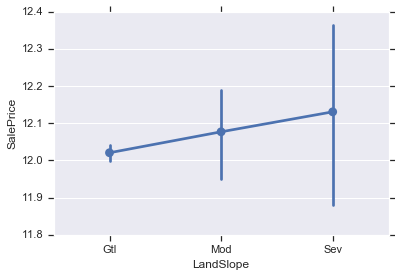

In [1748]:
sns.pointplot(x='LandSlope', y='SalePrice', data=train)

More the slope of the land for gentle and moderate slope , more price the house is sold for. For houses with severe land slope, the price is not very dependent on the slope.

In [1749]:
train['LandSlope'] = train['LandSlope'].map( {'Gtl':0, 'Mod':1,'Sev':2})
train['LandSlope'].unique()


array([0, 1, 2], dtype=int64)

## Neighborhood: Physical locations within Ames city limits

In [1750]:
train['Neighborhood'].unique()
# No null values

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

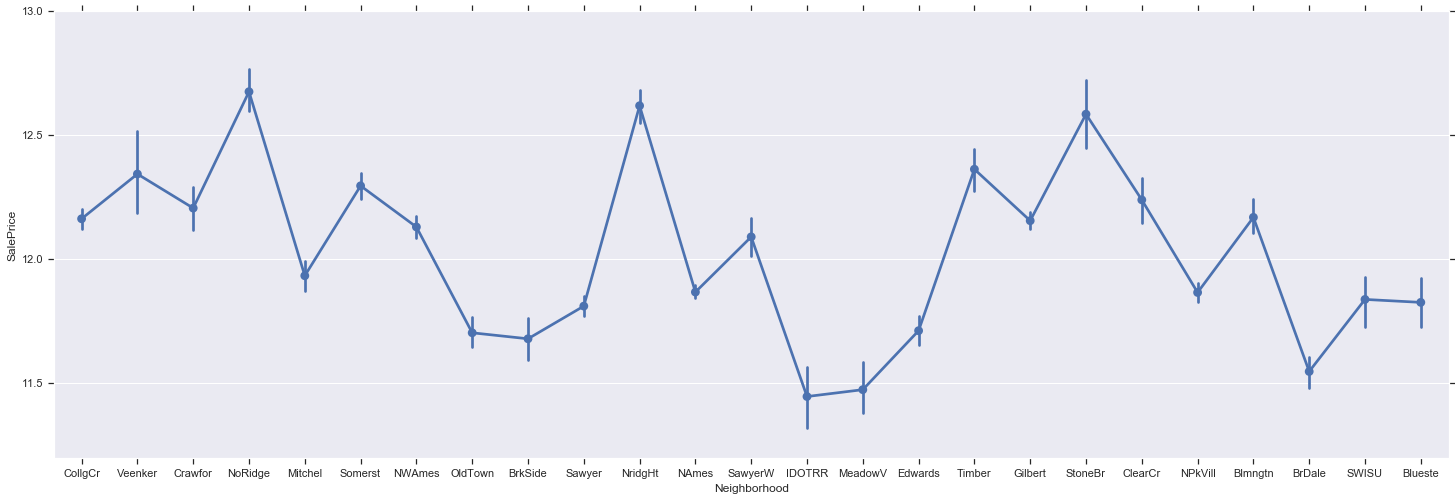

In [1751]:
fig, ax = plt.subplots(figsize=(25,8))
sns.pointplot(x='Neighborhood', y='SalePrice', data=train)

Looks like neighbohood has an effect on the sale price. From the graph above, the most expensive neighborhoods are NoRidge, NridgeHt and StoneBr.

In [1752]:
train = pd.get_dummies(train, columns=['Neighborhood'], drop_first=True)
train.shape

(1460, 115)

## Condition1 , 2: Proximity to various conditions

In [1753]:
print(train['Condition1'].unique())
print(train['Condition2'].unique())
#No null values

['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']


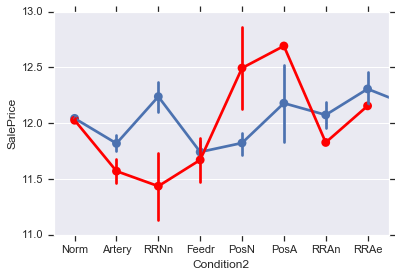

In [1754]:
sns.pointplot(x='Condition1', y='SalePrice', data=train)
sns.pointplot(x='Condition2', y='SalePrice', data=train,color='red')

#yet to write conclusions

In [1755]:
train = pd.get_dummies(train, columns=['Condition1'], drop_first=True)
train.shape

(1460, 122)

In [1756]:
train = pd.get_dummies(train, columns=['Condition2'], drop_first=True)
train.shape

(1460, 128)

## BldgType: Type of dwelling

In [1757]:
train['BldgType'].unique()
#No null values

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

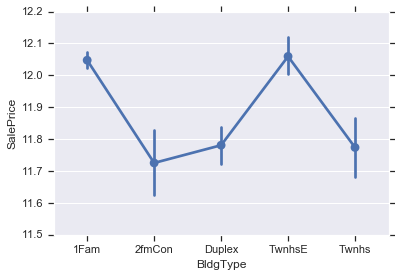

In [1758]:
sns.pointplot(x='BldgType', y='SalePrice', data=train)

1 family and town house end units cost more than other types of buildings

In [1759]:
train = pd.get_dummies(train, columns=['BldgType'], drop_first=True)
train.shape

(1460, 131)

## HouseStyle: Style of dwelling

In [1760]:
train['HouseStyle'].unique()
#No null values

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

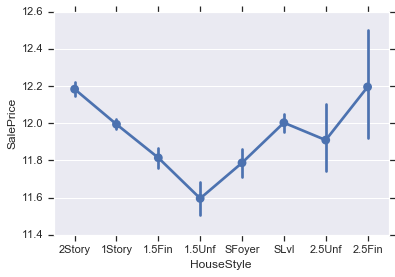

In [1761]:
sns.pointplot(x='HouseStyle', y='SalePrice', data=train)

In [1762]:
train = pd.get_dummies(train, columns=['HouseStyle'], drop_first=True)
train.shape

(1460, 137)

## OverallQual: Rates the overall material and finish of the house

In [1763]:
train['OverallQual'].unique()
#No null values

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

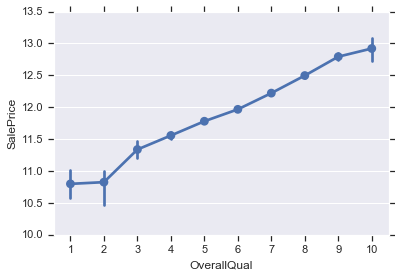

In [1764]:
sns.pointplot(x='OverallQual', y='SalePrice', data=train)

Overall Quality of the house has a clear linear relationship with the sale price. Better the quality, higher the sale price.

## OverallCond: Rates the overall condition of the house

In [1765]:
train['OverallCond'].unique()
#No null values

array([5, 8, 6, 7, 4, 2, 3, 9, 1], dtype=int64)

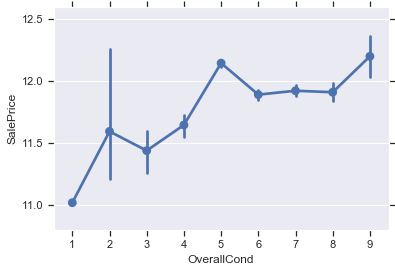

In [1766]:
sns.pointplot(x='OverallCond', y='SalePrice', data=train)

In general improving the overal condition of the house increases the sale price with an unexplained drop for rating 3 and 6. This could be because of some other factors

## YearBuilt: Original construction date

In [1767]:
train['YearBuilt'].unique()
#No null values

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
       1872, 1905], dtype=int64)

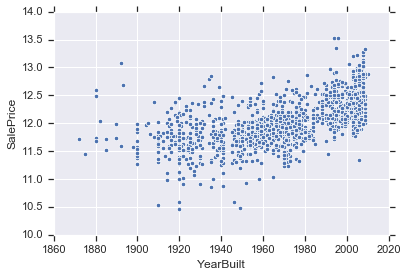

In [1768]:
sns.scatterplot(x='YearBuilt', y='SalePrice', data=train)

House price increases as year built increases from 1940 to 2010 and before 1940, they are almost constant.

## YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

In [1769]:
train['YearRemodAdd'].unique()
#No null values

array([2003, 1976, 2002, 1970, 2000, 1995, 2005, 1973, 1950, 1965, 2006,
       1962, 2007, 1960, 2001, 1967, 2004, 2008, 1997, 1959, 1990, 1955,
       1983, 1980, 1966, 1963, 1987, 1964, 1972, 1996, 1998, 1989, 1953,
       1956, 1968, 1981, 1992, 2009, 1982, 1961, 1993, 1999, 1985, 1979,
       1977, 1969, 1958, 1991, 1971, 1952, 1975, 2010, 1984, 1986, 1994,
       1988, 1954, 1957, 1951, 1978, 1974], dtype=int64)

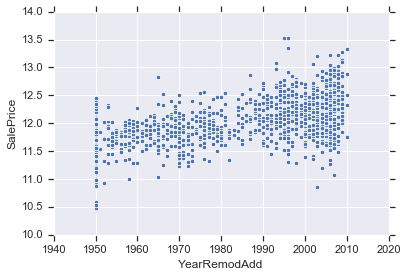

In [1770]:
sns.scatterplot(x='YearRemodAdd', y='SalePrice', data=train)

There is a slight positive correlation between Sale price and Year Remodeled

## RoofStyle

In [1771]:
train['RoofStyle'].unique()
#No null values

array(['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], dtype=object)

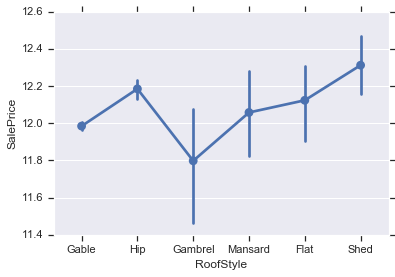

In [1772]:
sns.pointplot(x='RoofStyle', y='SalePrice', data=train)

In [1773]:
train = pd.get_dummies(train, columns=['RoofStyle'], drop_first=True)
train.shape

(1460, 141)

Roof style of Gambrel has a low price comared to others.

## RoofMatl: Roof material

In [1774]:
train['RoofMatl'].unique()
#No null values

array(['CompShg', 'WdShngl', 'Metal', 'WdShake', 'Membran', 'Tar&Grv',
       'Roll', 'ClyTile'], dtype=object)

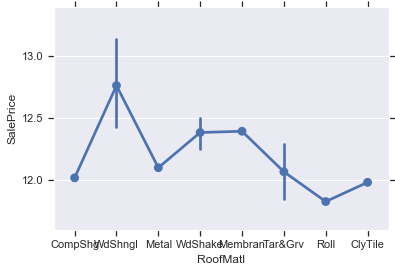

In [1775]:
sns.pointplot(x='RoofMatl', y='SalePrice', data=train)

In [1776]:
train = pd.get_dummies(train, columns=['RoofMatl'], drop_first=True)
train.shape

(1460, 147)

## Exterior: Exterior covering on house

In [1777]:
train['Exterior1st'].unique()
train['Exterior2nd'].unique()
#No null values

array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock'], dtype=object)

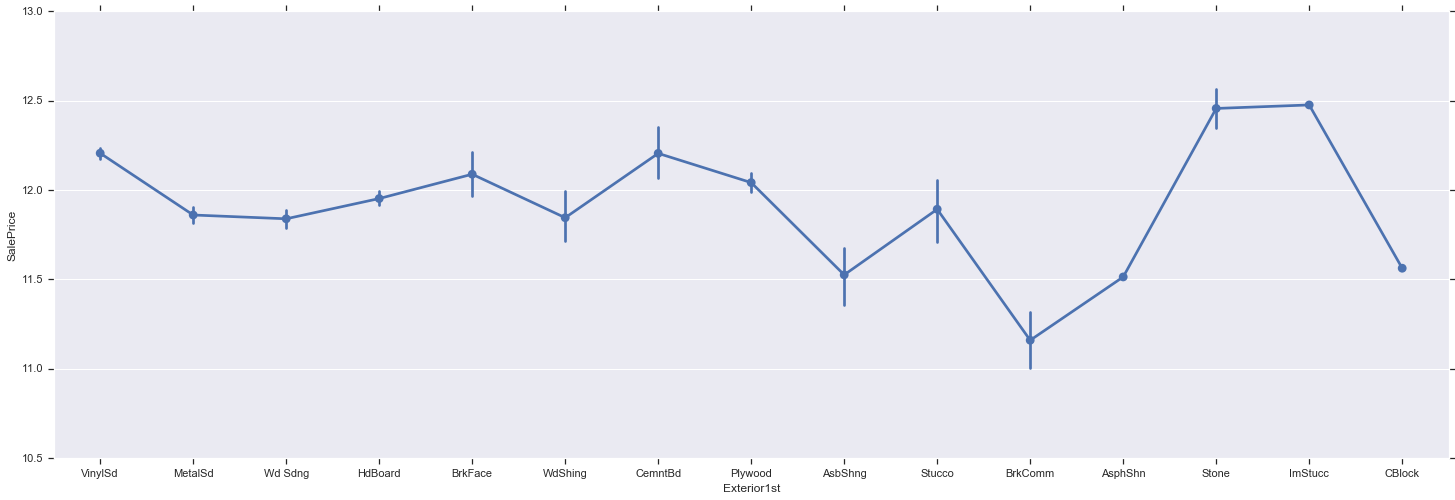

In [1778]:
fig, ax = plt.subplots(figsize=(25,8))
sns.pointplot(x='Exterior1st', y='SalePrice', data=train)

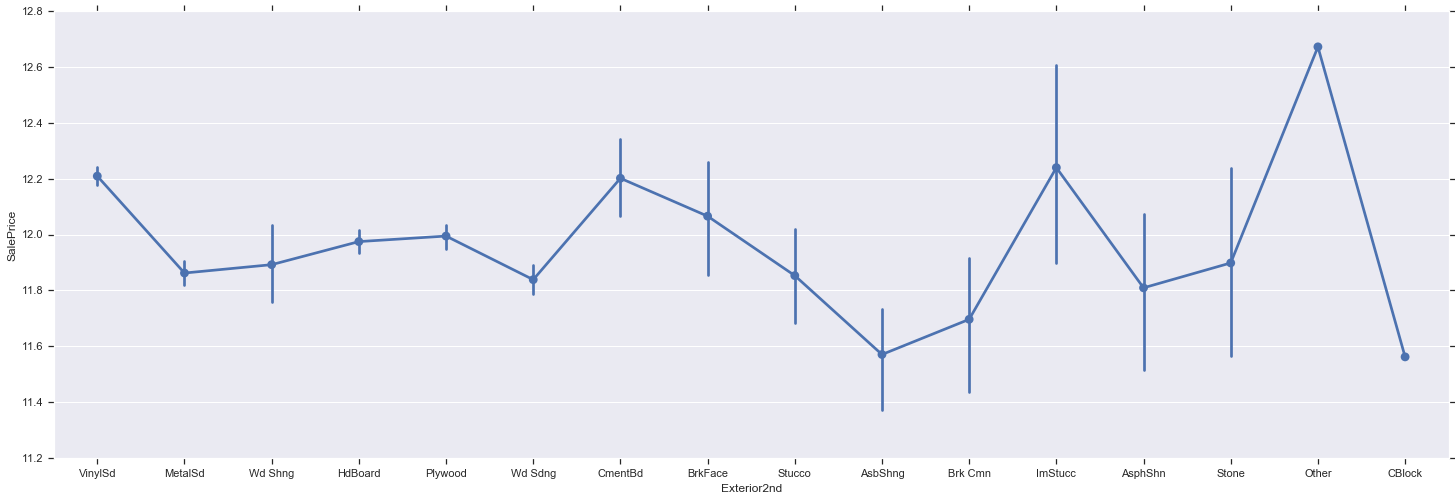

In [1779]:
fig, ax = plt.subplots(figsize=(25,8))
sns.pointplot(x='Exterior2nd', y='SalePrice', data=train)

In [1780]:
train = pd.get_dummies(train, columns=['Exterior2nd'], drop_first=True)
train.shape

(1460, 161)

In [1781]:
train = pd.get_dummies(train, columns=['Exterior1st'], drop_first=True)
train.shape

(1460, 174)

## MasVnrType

In [1782]:
train['MasVnrType'].unique()
train['MasVnrType']=train['MasVnrType'].fillna('None')
# Replacing null values with None

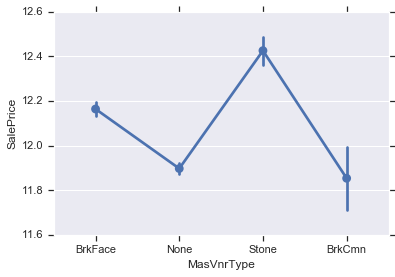

In [1783]:
sns.pointplot(x='MasVnrType', y='SalePrice', data=train)

In [1784]:
train = pd.get_dummies(train, columns=['MasVnrType'], drop_first=True)
train.shape


(1460, 176)

## MasVnrArea

In [1785]:
train['MasVnrArea'].isnull().sum()
train['MasVnrArea']=train['MasVnrArea'].fillna(0)
# Replacing null values with 0

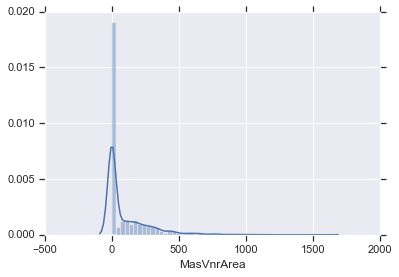

In [1786]:
sns.distplot(train['MasVnrArea'])

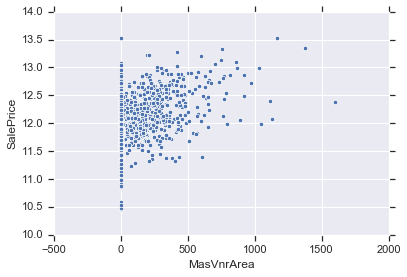

In [1787]:
sns.scatterplot(x='MasVnrArea', y='SalePrice', data=train)


In [1788]:
pearsonr(train['MasVnrArea'],train['SalePrice'])
#Positive correlation is present between MasVnrArea and SalePrice

(0.42677513183636501, 1.0779190549156068e-65)

## ExterQual:Evaluates the quality of the material on the exterior 

In [1789]:
train['ExterQual'].unique()
#No null values

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

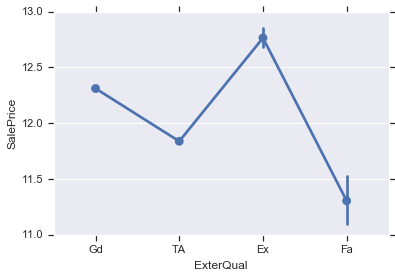

In [1790]:
sns.pointplot(x='ExterQual', y='SalePrice', data=train)
#Excellent quality exteriors have higher rices.

In [1791]:
train['ExterQual'] = train['ExterQual'].map( {'Po':0, 'Fa':1, 'TA':2,'Gd':3,'Ex':4})
#Label encoding to transform categorical data

## ExterCond: Evaluates the present condition of the material on the exterior

In [1792]:
train['ExterCond'].unique()
#No null values

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

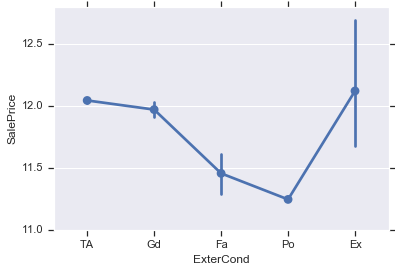

In [1793]:
sns.pointplot(x='ExterCond', y='SalePrice', data=train)
#Present quality exteriors that are excellent have higher rices.

In [1794]:
train['ExterCond'] = train['ExterCond'].map( {'Po':0, 'Fa':1, 'TA':2,'Gd':3,'Ex':4})
#Label encoding to transform categorical data

## Foundation: Type of foundation

In [1795]:
train['Foundation'].unique()
#No null values

array(['PConc', 'CBlock', 'BrkTil', 'Wood', 'Slab', 'Stone'], dtype=object)

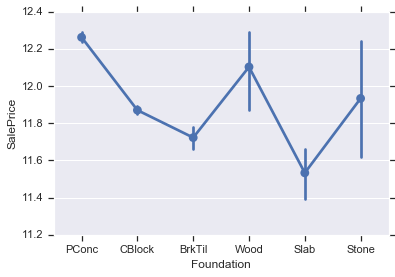

In [1796]:
sns.pointplot(x='Foundation', y='SalePrice', data=train)

In [1797]:
train = pd.get_dummies(train, columns=['Foundation'], drop_first=True)
train.shape

(1460, 180)

## BsmtQual: Evaluates the height of the basement

In [1798]:
train['BsmtQual'].unique()
train['BsmtQual']=train['BsmtQual'].fillna('None')
#No null values

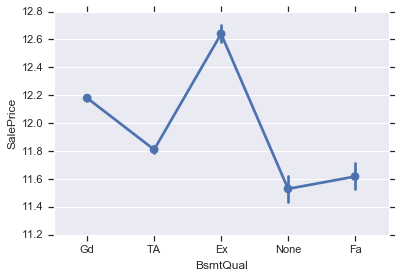

In [1799]:
sns.pointplot(x='BsmtQual', y='SalePrice', data=train)

In [1800]:
train['BsmtQual'] = train['BsmtQual'].map( {'Po':1, 'Fa':2, 'TA':3,'Gd':4,'Ex':5,'None':0})
train['BsmtQual'].unique()
#Label encoding


array([4, 3, 5, 0, 2], dtype=int64)

## BsmtCond: Evaluates the general condition of the basement

In [1801]:
train['BsmtCond'].unique()
train['BsmtCond']=train['BsmtCond'].fillna('None')
#Replacing missing values with None


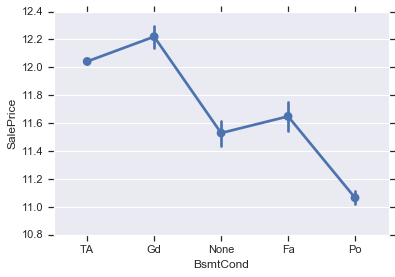

In [1802]:
sns.pointplot(x='BsmtCond', y='SalePrice', data=train)

In [1803]:
train['BsmtCond'] = train['BsmtCond'].map( {'Po':0, 'Fa':2, 'TA':3,'Gd':4,'Ex':5,'None':1})
train['BsmtCond'].unique()
#Label encoding

array([3, 4, 1, 2, 0], dtype=int64)

## BsmtExposure: Refers to walkout or garden level walls

In [1804]:
print(train['BsmtExposure'].unique())
train['BsmtExposure']=train['BsmtExposure'].fillna('None')
#replaced nulls with None

['No' 'Gd' 'Mn' 'Av' nan]


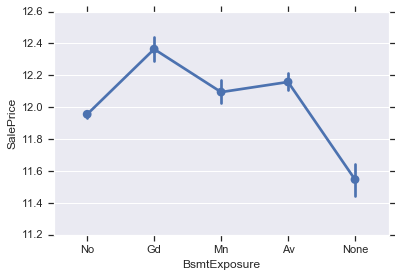

In [1805]:
sns.pointplot(x='BsmtExposure', y='SalePrice', data=train)

In [1806]:
train['BsmtExposure'] = train['BsmtExposure'].map( {'No':1, 'Mn':2, 'Av':3,'Gd':4,'None':0})
train['BsmtExposure'].unique()
#Label encoding

array([1, 4, 2, 3, 0], dtype=int64)

## BsmtFinType1: Rating of basement finished area

In [1807]:
print(train['BsmtFinType1'].unique())
train['BsmtFinType1']=train['BsmtFinType1'].fillna('None')

['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']


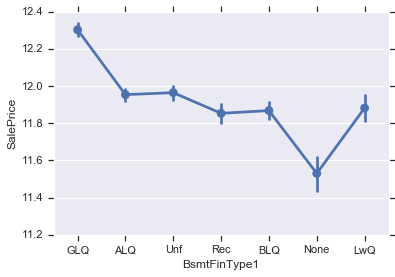

In [1808]:
sns.pointplot(x='BsmtFinType1', y='SalePrice', data=train)

In [1809]:
train['BsmtFinType1'] = train['BsmtFinType1'].map( {'Rec':1, 'BLQ':2, 'LwQ':3,'ALQ':4,'None':0,'Unf':5,'GLQ':6})
train['BsmtFinType1'].unique()

array([6, 4, 5, 1, 2, 0, 3], dtype=int64)

## BsmtFinSF2:Type 2 finished square feet

In [1810]:
train['BsmtFinSF2'].isnull().sum()
#no null values

0

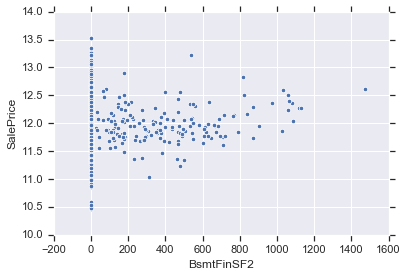

In [1811]:
sns.scatterplot(x='BsmtFinSF2', y='SalePrice', data=train)

In [1812]:
pearsonr(train['SalePrice'],train['BsmtFinSF2'])
#Very negligble correlation

(0.0048324105320466494, 0.85362979731448019)

## BsmtUnfSF: Unfinished square feet of basement area

In [1813]:
train['BsmtUnfSF'].isnull().sum()
#no null values


0

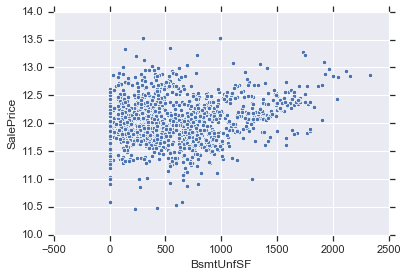

In [1814]:
sns.scatterplot(x='BsmtUnfSF', y='SalePrice', data=train)

In [1815]:
pearsonr(train['BsmtUnfSF'],train['SalePrice'])
#No correlation when unfinished basement area is below 1000. but positive correlation for value above 1000

(0.22198505352520975, 9.3185271773124899e-18)

## TotalBsmtSF: Total square feet of basement area

In [1816]:
train['TotalBsmtSF'].isnull().sum()
# no null values

0

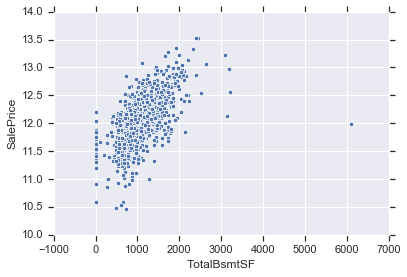

In [1817]:
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=train)

In [1818]:
pearsonr(train['TotalBsmtSF'],train['SalePrice'])
#Strong positive correlation

(0.61213397536978642, 7.5345510544825367e-151)

## Heating: Type of heating

In [1819]:
train['Heating'].unique()
#no null values

array(['GasA', 'GasW', 'Grav', 'Wall', 'OthW', 'Floor'], dtype=object)

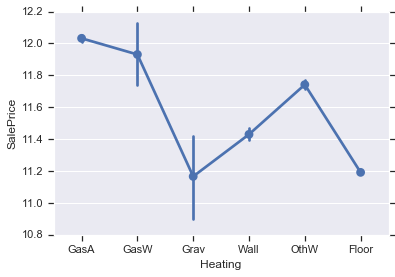

In [1820]:
sns.pointplot(x='Heating', y='SalePrice', data=train)

In [1821]:
train = pd.get_dummies(train, columns=['Heating'], drop_first=True)
train.shape

(1460, 184)

## HeatingQC: Heating quality and condition

In [1822]:
train['HeatingQC'].unique()
#No null values

array(['Ex', 'Gd', 'TA', 'Fa', 'Po'], dtype=object)

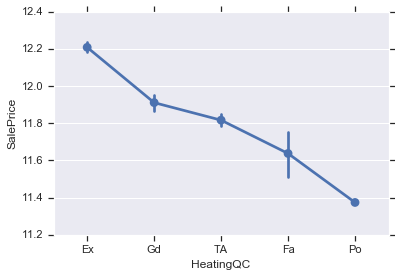

In [1823]:
sns.pointplot(x='HeatingQC', y='SalePrice', data=train)
#Better the heat quality more the price

In [1824]:
train['HeatingQC'] = train['HeatingQC'].map( {'Po':0, 'Fa':1, 'TA':2,'Gd':3,'Ex':4})
train['HeatingQC'].unique()

array([4, 3, 2, 1, 0], dtype=int64)

## CentralAir: Central air conditioning

In [1825]:
train['CentralAir'].unique()
#no null values

array(['Y', 'N'], dtype=object)

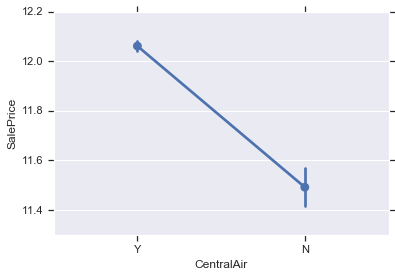

In [1826]:
sns.pointplot(x='CentralAir', y='SalePrice', data=train)
#Houses with central sir conditioning are sold for higher prices

In [1827]:
train['CentralAir'] = train['CentralAir'].map( {'Y':0, 'N':1})
train['CentralAir'].unique()

array([0, 1], dtype=int64)

## Electrical: Electrical system

In [1828]:
print(train['Electrical'].unique())
train['Electrical']=train['Electrical'].fillna('None')

['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]


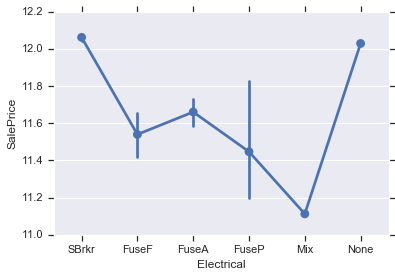

In [1829]:
sns.pointplot(x='Electrical', y='SalePrice', data=train)

In [1830]:
train = pd.get_dummies(train, columns=['Electrical'], drop_first=True)
train.shape

(1460, 188)

## 1stFlrSF: First Floor square feet

In [1831]:
train['1stFlrSF'].isnull().sum()
#no null values

0

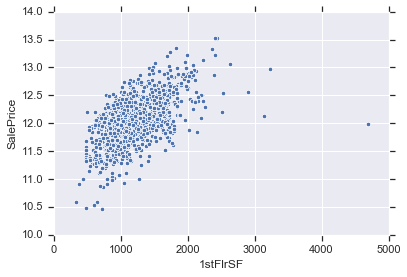

In [1832]:
sns.scatterplot(x='1stFlrSF', y='SalePrice', data=train)

In [1833]:
pearsonr(train['1stFlrSF'],train['SalePrice'])
#high positive correlation

(0.59698104503437388, 1.0746976620899014e-141)

## 2ndFlrSF: Second floor square feet

In [1834]:
train['2ndFlrSF'].isnull().sum()

0

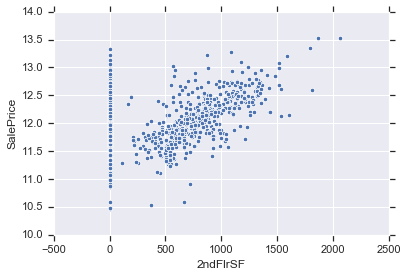

In [1835]:
sns.scatterplot(x='2ndFlrSF', y='SalePrice', data=train)

In [1836]:
pearsonr(train['2ndFlrSF'],train['SalePrice'])
#positive correlation

(0.3192999843472048, 5.8669016514948666e-36)

## LowQualFinSF: Low quality finished square feet (all floors)

In [1837]:
train['LowQualFinSF'].isnull().sum()

0

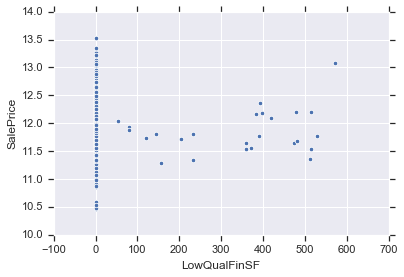

In [1838]:
sns.scatterplot(x='LowQualFinSF', y='SalePrice', data=train)

In [1839]:
pearsonr(train['LowQualFinSF'],train['SalePrice'])
#negligble correlation

(-0.037962803137426955, 0.14710401150502056)

## GrLivArea: Above grade (ground) living area square feet

In [1840]:
train['GrLivArea'].isnull().sum()
#GrLivArea= 1stFlrSF+2ndFlrSF

0

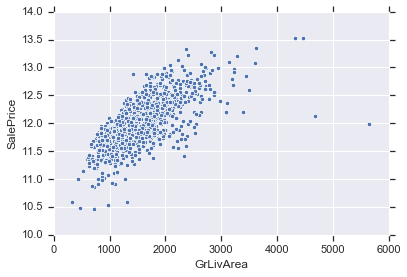

In [1841]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train)

In [1842]:
pearsonr(train['GrLivArea'],train['SalePrice'])
#strong positive correlation

(0.70092665254412978, 3.0602089126803109e-216)

## BsmtFullBath: Basement full bathrooms


In [1843]:
train['BsmtFullBath'].isnull().sum()

0

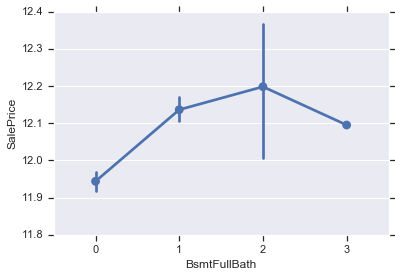

In [1844]:
sns.pointplot(x='BsmtFullBath', y='SalePrice', data=train)

In [1845]:
pearsonr(train['BsmtFullBath'],train['SalePrice'])

(0.23622410882434997, 5.7917122062089012e-20)

## BsmtHalfBath: Basement half bathrooms

In [1846]:
train['BsmtHalfBath'].isnull().sum()


0

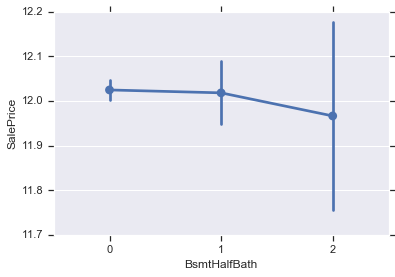

In [1847]:
sns.pointplot(x='BsmtHalfBath', y='SalePrice', data=train)

In [1848]:
pearsonr(train['BsmtHalfBath'],train['SalePrice'])

(-0.0051490940532397562, 0.84415669499994517)

## FullBath: Full bathrooms above grade

In [1849]:
train['FullBath'].isnull().sum()

0

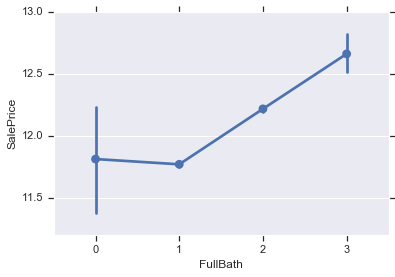

In [1850]:
sns.pointplot(x='FullBath', y='SalePrice', data=train)

In [1851]:
pearsonr(train['FullBath'],train['SalePrice'])
#strong positive correlation when full bath is more than 1

(0.59477054200753232, 2.1189582381664171e-140)

## HalfBath: Half baths above grade


In [1852]:
train['HalfBath'].isnull().sum()

0

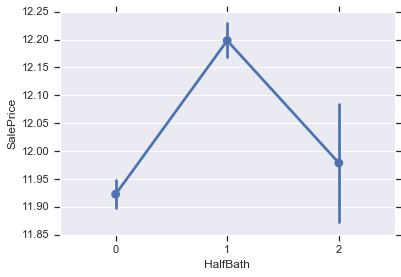

In [1853]:
sns.pointplot(x='HalfBath', y='SalePrice', data=train)

In [1854]:
pearsonr(train['HalfBath'],train['SalePrice'])

(0.31398224991514834, 9.1331331110816624e-35)

## Bedroom: Bedrooms above grade 

In [1855]:
train['BedroomAbvGr'].isnull().sum()

0

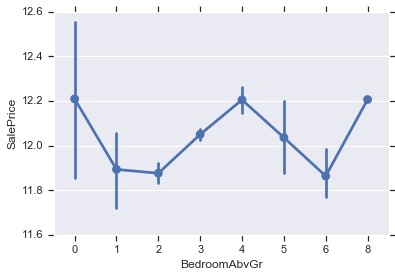

In [1856]:
sns.pointplot(x='BedroomAbvGr', y='SalePrice', data=train)

In [1857]:
pearsonr(train['BedroomAbvGr'],train['SalePrice'])

(0.20904368212692037, 7.0283226959887252e-16)

## Kitchen: Kitchens above grade

In [1858]:
train['KitchenAbvGr'].isnull().sum()

0

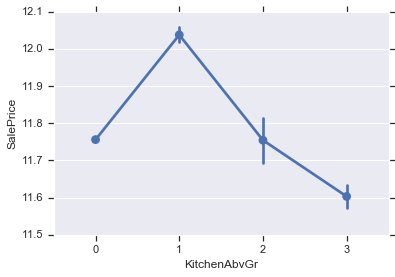

In [1859]:
sns.pointplot(x='KitchenAbvGr', y='SalePrice', data=train)

In [1860]:
pearsonr(train['KitchenAbvGr'],train['SalePrice'])

(-0.14754808847658166, 1.4788221582451725e-08)

## KitchenQual: Kitchen quality

In [1861]:
train['KitchenQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

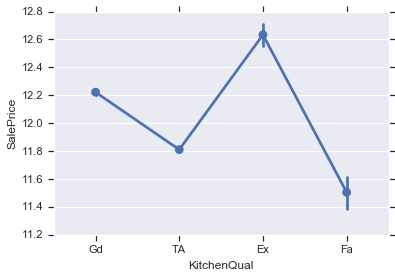

In [1862]:
sns.pointplot(x='KitchenQual', y='SalePrice', data=train)

In [1863]:
train['KitchenQual'] = train['KitchenQual'].map( {'Po':0, 'Fa':1, 'TA':2,'Gd':3,'Ex':4})
train['KitchenQual'].unique()

array([3, 2, 4, 1], dtype=int64)

## TotRmsAbvGrd: Total rooms above grade

In [1864]:
train['TotRmsAbvGrd'].isnull().sum()

0

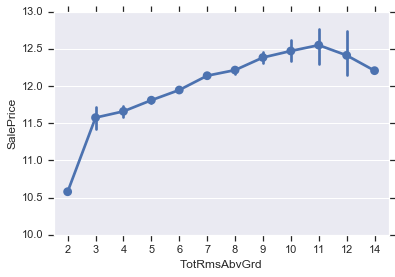

In [1865]:
sns.pointplot(x='TotRmsAbvGrd', y='SalePrice', data=train)

In [1866]:
pearsonr(train['TotRmsAbvGrd'],train['SalePrice'])

(0.53442220372312543, 1.2928037153043567e-108)

## Functional: Home functionality

In [1867]:
train['Functional'].unique()

array(['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev'], dtype=object)

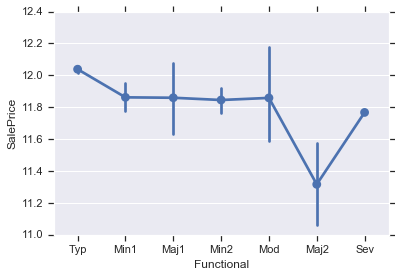

In [1868]:
sns.pointplot(x='Functional', y='SalePrice', data=train)

In [1869]:
train = pd.get_dummies(train, columns=['Functional'], drop_first=True)
train.shape

(1460, 193)

## Fireplaces: Number of fireplaces

In [1870]:
train['Fireplaces'].isnull().sum()

0

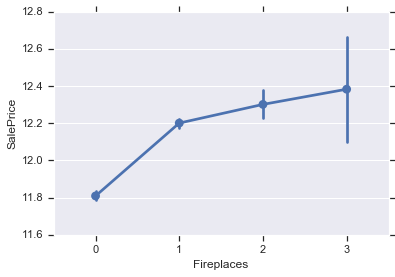

In [1871]:
sns.pointplot(x='Fireplaces', y='SalePrice', data=train)

In [1872]:
pearsonr(train['Fireplaces'],train['SalePrice'])

(0.48944942759848536, 8.4213498068020503e-89)

## FireplaceQu: Fireplace quality

In [1873]:
print(train['FireplaceQu'].unique())
train['FireplaceQu']=train['FireplaceQu'].fillna('None')

[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']


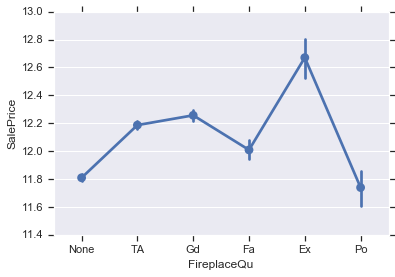

In [1874]:
sns.pointplot(x='FireplaceQu', y='SalePrice', data=train)

In [1875]:
train['FireplaceQu'] = train['FireplaceQu'].map( {'None':0, 'TA':3, 'Fa':2,'Gd':4,'Ex':5,'Po':1})
train['FireplaceQu'].unique()

array([0, 3, 4, 2, 5, 1], dtype=int64)

## GarageType: Garage location

In [1876]:
train['GarageType'].unique()
train['GarageType']=train['GarageType'].fillna('None')

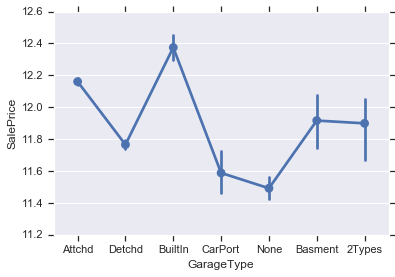

In [1877]:
sns.pointplot(x='GarageType', y='SalePrice', data=train)

In [1878]:
train = pd.get_dummies(train, columns=['GarageType'], drop_first=True)
train.shape

(1460, 198)

## GarageYrBlt: Year garage was built

In [1879]:
train['GarageYrBlt'].isnull().sum()
train['GarageYrBlt']=train['GarageYrBlt'].fillna(0)

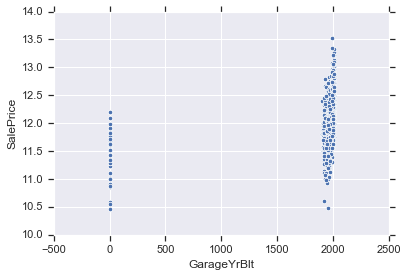

In [1880]:
sns.scatterplot(x='GarageYrBlt', y='SalePrice', data=train)

## GarageFinish: Interior finish of the garage

In [1881]:
train['GarageFinish'].unique()
train['GarageFinish']=train['GarageFinish'].fillna('None')

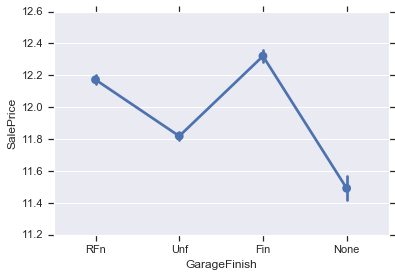

In [1882]:
sns.pointplot(x='GarageFinish', y='SalePrice', data=train)

In [1883]:
train = pd.get_dummies(train, columns=['GarageFinish'], drop_first=True)
train.shape

(1460, 200)

## GarageCars: Size of garage in car capacity

In [1884]:
train['GarageCars'].isnull().sum()

0

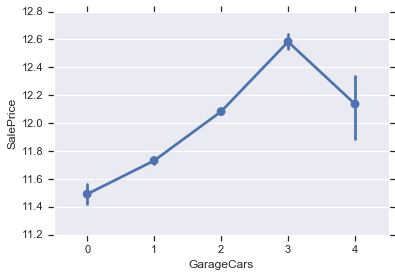

In [1885]:
sns.pointplot(x='GarageCars', y='SalePrice', data=train)

In [1886]:
pearsonr(train['GarageCars'],train['SalePrice'])

(0.6806248074360467, 3.0937555992025991e-199)

## GarageArea: Size of garage in square feet

In [1887]:
train['GarageArea'].isnull().sum()

0

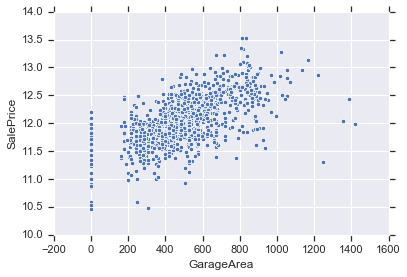

In [1888]:
sns.scatterplot(x='GarageArea', y='SalePrice', data=train)

In [1889]:
pearsonr(train['GarageArea'],train['SalePrice'])

(0.6508875559020072, 1.1062553712862458e-176)

## GarageQual: Garage quality

In [1890]:
train['GarageQual']=train['GarageQual'].fillna('None')
train['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', 'None', 'Ex', 'Po'], dtype=object)

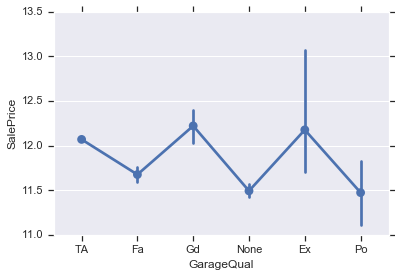

In [1891]:
sns.pointplot(x='GarageQual', y='SalePrice', data=train)

In [1892]:
train['GarageQual'] = train['GarageQual'].map( {'Po':1, 'Fa':2, 'TA':3,'Gd':4,'Ex':5,'None':6})
train['GarageQual'].unique()

array([3, 2, 4, 6, 5, 1], dtype=int64)

## GarageCond: Garage condition

In [1893]:
train['GarageCond']=train['GarageCond'].fillna('None')
train['GarageCond'].unique()

array(['TA', 'Fa', 'None', 'Gd', 'Po', 'Ex'], dtype=object)

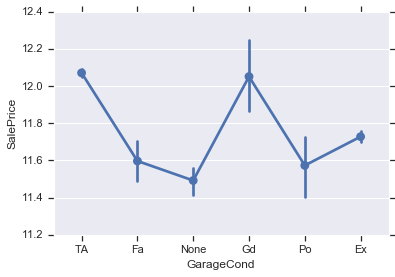

In [1894]:
sns.pointplot(x='GarageCond', y='SalePrice', data=train)

In [1895]:
train['GarageCond'] = train['GarageCond'].map( {'Po':1, 'Fa':2, 'TA':3,'Gd':4,'Ex':5,'None':0})
train['GarageCond'].unique()

array([3, 2, 0, 4, 1, 5], dtype=int64)

## PavedDrive: Paved driveway

In [1896]:
train['PavedDrive'].unique()

array(['Y', 'N', 'P'], dtype=object)

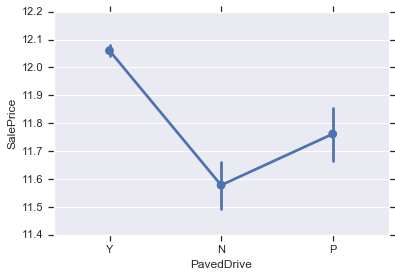

In [1897]:
sns.pointplot(x='PavedDrive', y='SalePrice', data=train)

In [1898]:
train = pd.get_dummies(train, columns=['PavedDrive'], drop_first=True)
train.shape

(1460, 201)

## WoodDeckSF: Wood deck area in square feet

In [1899]:
train['WoodDeckSF'].isnull().sum()

0

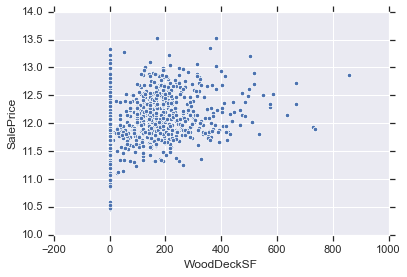

In [1900]:
sns.scatterplot(x='WoodDeckSF', y='SalePrice', data=train)

In [1901]:
pearsonr(train['WoodDeckSF'],train['SalePrice'])

(0.33413507395751274, 2.0553242256201265e-39)

## OpenPorchSF: Open porch area in square feet

In [1902]:
train['OpenPorchSF'].isnull().sum()

0

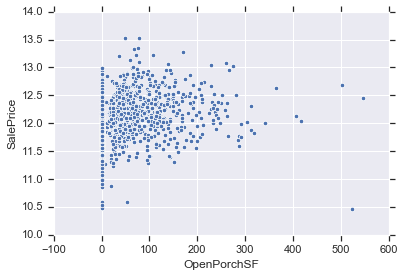

In [1903]:
sns.scatterplot(x='OpenPorchSF', y='SalePrice', data=train)

In [1904]:
pearsonr(train['OpenPorchSF'],train['SalePrice'])

(0.32105297201976746, 2.3446259016929643e-36)

## EnclosedPorch: Enclosed porch area in square feet

In [1905]:
train['EnclosedPorch'].isnull().sum()

0

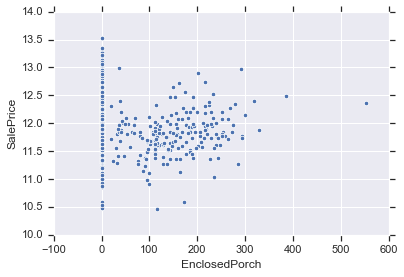

In [1906]:
sns.scatterplot(x='EnclosedPorch', y='SalePrice', data=train)

In [1907]:
pearsonr(train['EnclosedPorch'],train['SalePrice'])

(-0.1490502814276764, 1.0508082916769661e-08)

## 3SsnPorch: Three season porch area in square feet

In [1908]:
train['3SsnPorch'].isnull().sum()

0

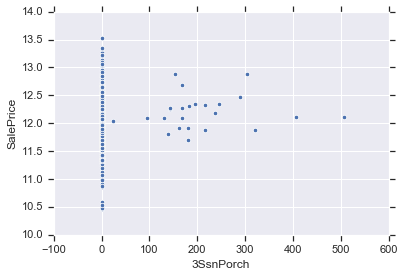

In [1909]:
sns.scatterplot(x='3SsnPorch', y='SalePrice', data=train)

In [1910]:
pearsonr(train['3SsnPorch'],train['SalePrice'])

(0.054900226467620425, 0.035947570733807825)

## ScreenPorch: Screen porch area in square feet

In [1911]:
train['ScreenPorch'].isnull().sum()

0

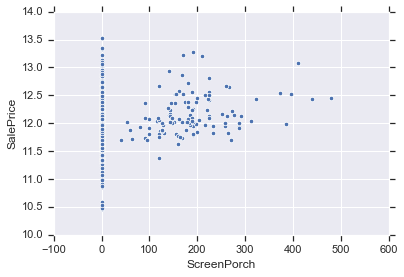

In [1912]:
sns.scatterplot(x='ScreenPorch', y='SalePrice', data=train)

In [1913]:
pearsonr(train['ScreenPorch'],train['SalePrice'])

(0.12120760489686369, 3.4089706598109238e-06)

## PoolArea: Pool area in square feet

In [1914]:
train['PoolArea'].isnull().sum()

0

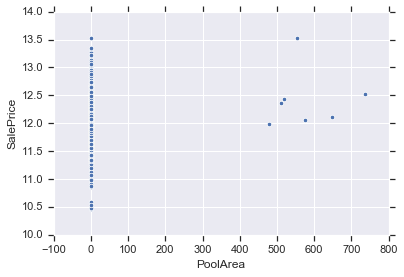

In [1915]:
sns.scatterplot(x='PoolArea', y='SalePrice', data=train)

In [1916]:
pearsonr(train['PoolArea'],train['SalePrice'])

(0.069797806009691765, 0.0076317807030944719)

## PoolQC: Pool quality
		

In [1917]:
train['PoolQC']=train['PoolQC'].fillna('None')
train['PoolQC'].isnull().sum()

0

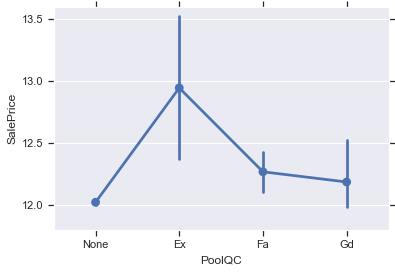

In [1918]:
sns.pointplot(x='PoolQC', y='SalePrice', data=train)

In [1919]:
train['PoolQC'] = train['PoolQC'].map( {'Fa':1, 'TA':2,'Gd':3,'Ex':4,'None':0})
train['PoolQC'].unique()

array([0, 4, 1, 3], dtype=int64)

## Fence: Fence quality

In [1920]:
train['Fence']=train['Fence'].fillna('None')
train['Fence'].isnull().sum()

0

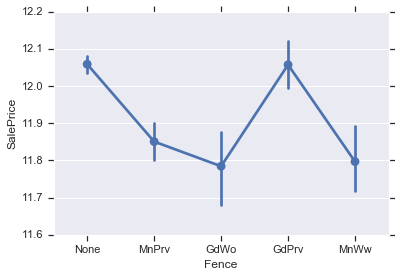

In [1921]:
sns.pointplot(x='Fence', y='SalePrice', data=train)

In [1922]:
train = pd.get_dummies(train, columns=['Fence'], drop_first=True)
train.shape

(1460, 204)

## MiscFeature: Miscellaneous feature not covered in other categories

In [1923]:
train['MiscFeature']=train['MiscFeature'].fillna('None')
train['MiscFeature'].isnull().sum()

0

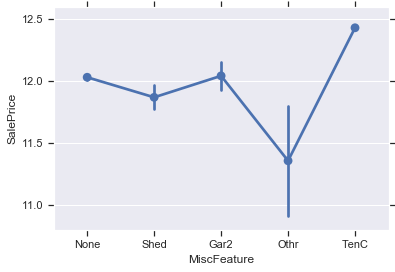

In [1924]:
sns.pointplot(x='MiscFeature', y='SalePrice', data=train)

In [1925]:
train = pd.get_dummies(train, columns=['MiscFeature'], drop_first=True)
train.shape

(1460, 207)

## MiscVal: $Value of miscellaneous feature

In [1926]:
train['MiscVal'].isnull().sum()

0

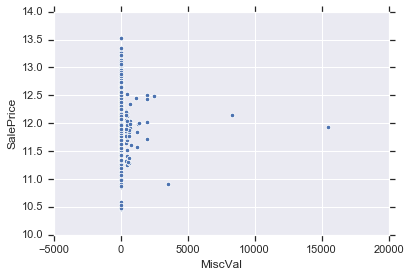

In [1927]:
sns.scatterplot(x='MiscVal', y='SalePrice', data=train)

## MoSold: Month Sold (MM)

In [1928]:
train['MoSold'].isnull().sum()

0

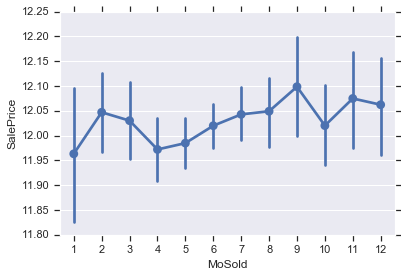

In [1929]:
sns.pointplot(x='MoSold', y='SalePrice', data=train)

## YrSold: Year Sold (YYYY)

In [1930]:
train['YrSold'].isnull().sum()

0

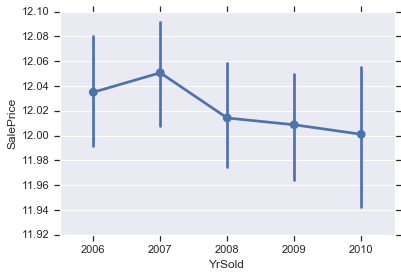

In [1931]:
sns.pointplot(x='YrSold', y='SalePrice', data=train)

## SaleType: Type of sale

In [1932]:
train['SaleType'].isnull().sum()

0

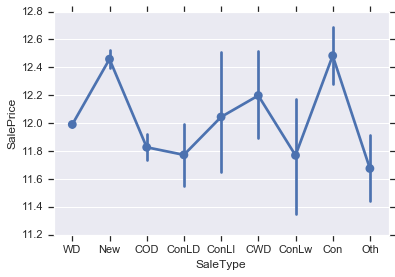

In [1933]:
sns.pointplot(x='SaleType', y='SalePrice', data=train)

In [1934]:
train = pd.get_dummies(train, columns=['SaleType'], drop_first=True)
train.shape

(1460, 214)

## SaleCondition: Condition of sale

In [1935]:
train['SaleCondition'].isnull().sum()

0

Flushing oldest 200 entries.


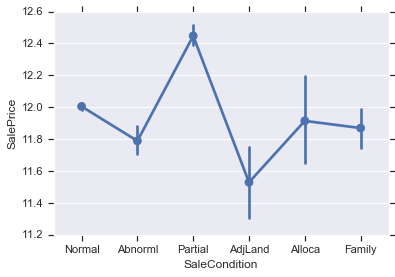

In [1936]:
sns.pointplot(x='SaleCondition', y='SalePrice', data=train)

In [1937]:
train = pd.get_dummies(train, columns=['SaleCondition'], drop_first=True)
train.shape

(1460, 218)

## BsmtFinSF1: Type 1 finished square feet

In [1938]:
train['BsmtFinSF1'].isnull().sum()

0

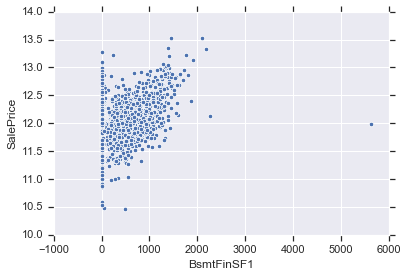

In [1939]:
sns.scatterplot(x='BsmtFinSF1', y='SalePrice', data=train)

In [1940]:
pearsonr(train['BsmtFinSF1'],train['SalePrice'])

(0.3720230735670883, 3.845951043382083e-49)

## BsmtFinType2: Rating of basement finished area (if multiple types)

In [1941]:
train['BsmtFinType2'].isnull().sum()
train['BsmtFinType2']=train['BsmtFinType2'].fillna('None')

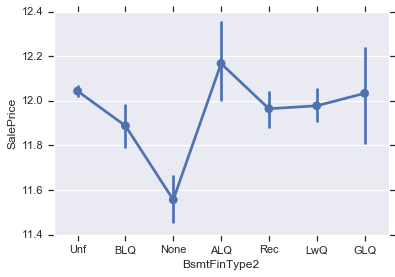

In [1942]:
sns.pointplot(x='BsmtFinType2', y='SalePrice', data=train)

In [1943]:
train = pd.get_dummies(train, columns=['BsmtFinType2'], drop_first=True)
train.shape


(1460, 223)

## Correlations

In [1944]:
numerical_data=train.loc[:,numeric_columns]

In [1945]:
corr=numerical_data.corr()["SalePrice"]
corr[np.argsort(corr, axis=0)[::-1]]

SalePrice        1.000000
OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
MasVnrArea       0.426775
BsmtFinSF1       0.372023
GarageYrBlt      0.349014
LotFrontage      0.335292
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057329
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64

There are 10 variable which have a correlation with sale price greater than 0.5. But some of these variables seem to be correlated with each other like Garage cars and Garage area etc. Let's take a look at what predictor variables are correlated with each other.

In [1946]:
correlations=numerical_data.corr()
attrs = correlations.iloc[:-1,:-1] # all except target

threshold = 0.5
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), 
        columns=['Attribute Pair', 'Correlation'])

    # sorted by absolute value
unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['Correlation']).argsort()[::-1]]

unique_important_corrs

,Attribute Pair,Correlation
13,"(GarageArea, GarageCars)",0.882475
5,"(GrLivArea, TotRmsAbvGrd)",0.825489
20,"(1stFlrSF, TotalBsmtSF)",0.819530
6,"(2ndFlrSF, GrLivArea)",0.687501
8,"(BedroomAbvGr, TotRmsAbvGrd)",0.676620
16,"(BsmtFinSF1, BsmtFullBath)",0.649212
19,"(FullBath, GrLivArea)",0.630012
22,"(2ndFlrSF, TotRmsAbvGrd)",0.616423
1,"(2ndFlrSF, HalfBath)",0.609707
18,"(GarageCars, OverallQual)",0.600671


This shows that there is multicollinearity in our data which needs to be addressed. For every pair of correlated variables, we will remove one of the two. But first let's do some Feature Engineering before we proceed any further.

## Feature Engineering

### Total Square Feet

Total square feet of the house is an important feature which decides the price of the house. Let's create a new variable TotSqFeet which sums up the total living square feet and basement square feet.

(0.7732768410005626, 8.8318328206338694e-291)

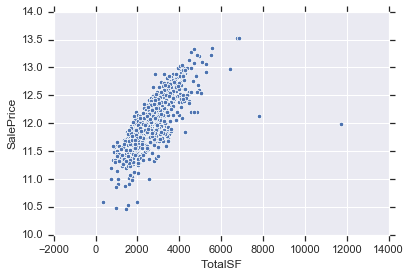

In [1947]:
train['TotalSF']=train['GrLivArea']+train['TotalBsmtSF']
sns.scatterplot(x='TotalSF', y='SalePrice', data=train)
pearsonr(train['TotalSF'],train['SalePrice'])

As expected , the correlation with SalePrice is very strong indeed (0.78). 

## Total bathrooms
No of bathrooms in the house is another important dictator of the house price. Hence let's add a new variable total bathroom with a weight of 1 for full bathroom and 0.5 for half bathroom.

(0.67301059404343444, 3.2900809256324259e-193)

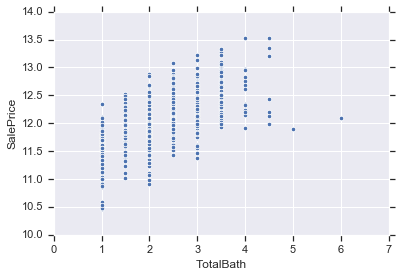

In [1948]:
train['TotalBath']=train['FullBath']+train['BsmtFullBath']+0.5*train['HalfBath']+0.5*train['BsmtHalfBath']
sns.scatterplot(x='TotalBath', y='SalePrice', data=train)
pearsonr(train['TotalBath'],train['SalePrice'])

Combining all bathroom variables into one variable has a very strong correlation with the Sale Price as compared to individual bathroom variables.

## Age of the house

As one would expect, the newer the house the better and higher the price. HEnce let's add a new column to calculate the age of the house and test it's correlation with the sale price


(-0.58729004702913656, 4.3069692054028673e-136)

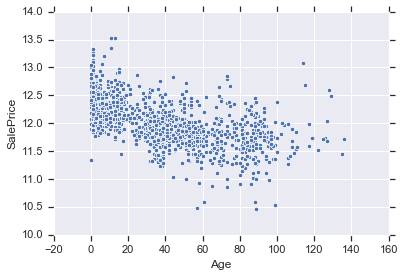

In [1949]:
train['Age']=train['YrSold']-train['YearBuilt']
sns.scatterplot(x='Age', y='SalePrice', data=train)
pearsonr(train['Age'],train['SalePrice'])

With the newly added variables, lets go back and check the top variables correlated with sale price and correlations within the predictor variables.

In [1950]:
numeric_columns=numeric_columns.insert(0,'Age')
numeric_columns=numeric_columns.insert(0,'TotalBath')
numeric_columns=numeric_columns.insert(0,'TotalSF')

In [1951]:
numerical_data=train.loc[:,numeric_columns]
corr=numerical_data.corr()["SalePrice"]
corr[np.argsort(corr, axis=0)[::-1]]

SalePrice        1.000000
OverallQual      0.817184
TotalSF          0.773277
GrLivArea        0.700927
GarageCars       0.680625
TotalBath        0.673011
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
MasVnrArea       0.426775
BsmtFinSF1       0.372023
GarageYrBlt      0.349014
LotFrontage      0.335292
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057329
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
KitchenAbvGr    -0.147548
EnclosedPorc

In [1952]:
correlations=numerical_data.corr()
attrs = correlations.iloc[:-1,:-1] # all except target

threshold = 0.5
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), 
        columns=['Attribute Pair', 'Correlation'])

    # sorted by absolute value
unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['Correlation']).argsort()[::-1]]

unique_important_corrs

,Attribute Pair,Correlation
25,"(Age, YearBuilt)",-0.999036
20,"(GarageArea, GarageCars)",0.882475
13,"(GrLivArea, TotalSF)",0.880324
5,"(GrLivArea, TotRmsAbvGrd)",0.825489
26,"(TotalBsmtSF, TotalSF)",0.822888
35,"(1stFlrSF, TotalBsmtSF)",0.819530
41,"(1stFlrSF, TotalSF)",0.797678
21,"(FullBath, TotalBath)",0.694197
10,"(2ndFlrSF, GrLivArea)",0.687501
2,"(TotRmsAbvGrd, TotalSF)",0.678802


As we can see there are quite a few predictors which are correlated with each other. But it's not fair to remove them just by looking at the pearson correlation. Hence we will use more robust methods like Ridge and Lasso regression to adress the issue of multicollinearity

## Variable Importance

There are multiple ways to check the importance of variables including Lasso Regression which we will examine in a bit. But before we start building our model, let take a quick look at the variable importance using a Random Forest.

In [1953]:
from sklearn.preprocessing import LabelEncoder
train2 = pd.read_csv('train.csv')
test2 = pd.read_csv('test.csv')
train2['TotalSF']=train2['GrLivArea']+train2['TotalBsmtSF']
train2['TotalBath']=train2['FullBath']+train2['BsmtFullBath']+0.5*train2['HalfBath']+0.5*train2['BsmtHalfBath']
train2['Age']=train2['YrSold']-train2['YearBuilt']
varimptrain=train2.apply(LabelEncoder().fit_transform)


In [1954]:
x=varimptrain.loc[:,varimptrain.columns != 'SalePrice']
x=x.loc[:,x.columns != 'Id']
y=varimptrain.loc[:,'SalePrice']
## Import the random forest model.
from sklearn.ensemble import RandomForestRegressor 
## This line instantiates the model. 
rf = RandomForestRegressor() 
## Fit the model on your training data.
rf.fit(x, y) 

import pandas as pd
data= {'column':x.columns,'importance':rf.feature_importances_}
feature_importances = pd.DataFrame(data=data).sort_values('importance',ascending=False)

imp_col=feature_importances[0:30]
imp_col

,column,importance
16,OverallQual,0.427342
79,TotalSF,0.347041
18,YearBuilt,0.018269
80,TotalBath,0.017786
19,YearRemodAdd,0.016522
61,GarageArea,0.013152
45,GrLivArea,0.011028
3,LotArea,0.010828
33,BsmtFinSF1,0.009712
57,GarageType,0.008848


## Model Building


## Lasso Regression

In [1955]:
x=train.loc[:,train.columns != 'SalePrice']
x=x.loc[:,x.columns != 'Id']
y=train.loc[:,'SalePrice']

In [1984]:

from sklearn.cross_validation import KFold,cross_val_score
from sklearn.linear_model import  LassoCV
alpha=np.arange(0.001,0.1, 0.0001)

Lassomod = LassoCV(alphas=alpha,cv=10, normalize = True)
Lassomod.fit(x,y)

# p = np.array([met.predict(xi) for xi in x])
p = Lassomod.predict(x)
e = p-y
total_error = np.dot(e,e)
rmse_train = np.sqrt(total_error/len(p))

kf = KFold(len(x), n_folds=10)
rmse= np.sqrt(-cross_val_score(Lassomod, x, y, scoring="mean_squared_error", cv = kf))

rmse_10cv =rmse.mean() 
print('Method: Lasso')
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)
print "\n"

Method: Lasso
RMSE on training: 0.1656
RMSE on 10-fold CV: 0.1673




In [1985]:
d = {'coef': Lassomod.coef_, 'col':x.columns}
coef=pd.DataFrame(data=d)

In [1986]:
coef[coef['coef']!=0]

,coef,col
4,0.088601,OverallQual
7,0.000891,YearRemodAdd
9,0.002880,ExterQual
19,0.000250,HeatingQC
20,-0.046320,CentralAir
24,0.000011,GrLivArea
31,0.032705,KitchenQual
34,0.010772,FireplaceQu
36,0.065470,GarageCars
52,0.006517,MSZoning_RL


## Ridge Regression

In [1996]:
from sklearn.cross_validation import KFold,cross_val_score
from sklearn.linear_model import  LassoCV
alpha=np.arange(0.001,0.1, 0.0001)

ridgecv = RidgeCV(alphas = alpha, scoring = 'mean_squared_error', normalize = True)
ridgecv.fit(x,y)

# p = np.array([met.predict(xi) for xi in x])
p = ridgecv.predict(x)
e = p-y
total_error = np.dot(e,e)
rmse_train = np.sqrt(total_error/len(p))

kf = KFold(len(x), n_folds=10)
rmse= np.sqrt(-cross_val_score(ridgecv, x, y, scoring="mean_squared_error", cv = kf))

rmse_10cv =rmse.mean() 
print('Method: Ridge')
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)
print "\n"

Method: Ridge
RMSE on training: 0.1114
RMSE on 10-fold CV: 0.1444




In [1999]:
d = {'coef': ridgecv.coef_, 'col':x.columns}
coef=pd.DataFrame(data=d)
coef
print(ridgecv.alpha_)

0.0999


## Elastic Net Regression

In [2018]:
from sklearn.cross_validation import KFold,cross_val_score
from sklearn.linear_model import  ElasticNetCV

l1_ratio=[.1, .5, .7, .9, .95, .99, 1]
elasticnetcv = ElasticNetCV(l1_ratio=0.8,cv=10, normalize = True)
elasticnetcv.fit(x,y)

# p = np.array([met.predict(xi) for xi in x])
p = elasticnetcv.predict(x)
e = p-y
total_error = np.dot(e,e)
rmse_train = np.sqrt(total_error/len(p))

kf = KFold(len(x), n_folds=10)
rmse= np.sqrt(-cross_val_score(elasticnetcv, x, y, scoring="mean_squared_error", cv = kf))

rmse_10cv =rmse.mean() 
print('Method: Elastic Net')
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)
print "\n"

Method: Elastic Net
RMSE on training: 0.1229
RMSE on 10-fold CV: 0.1407




In [2019]:
d = {'coef': elasticnetcv.coef_, 'col':x.columns}
coef=pd.DataFrame(data=d)
coef[coef['coef']!=0]

,coef,col
0,-0.000273,MSSubClass
2,0.000001,LotArea
4,0.056543,OverallQual
5,0.029156,OverallCond
6,0.000393,YearBuilt
7,0.000635,YearRemodAdd
8,0.000004,MasVnrArea
9,0.014482,ExterQual
11,0.018055,BsmtQual
13,0.014491,BsmtExposure


In [2020]:
elasticnetcv.l1_ratio_

0.80000000000000004

## Boosting

In [ ]:
import xgboost
from sklearn.grid_search import GridSearchCV
#for tuning parameters
parameters_for_testing = {
    'colsample_bytree':[0.4,0.6,0.8],
    'gamma':[0,0.03,0.1,0.3],
    'min_child_weight':[1.5,6,10],
    'learning_rate':[0.1,0.07],
    'max_depth':[3,5],
    'n_estimators':[10000],
    'reg_alpha':[1e-5, 1e-2,  0.75],
    'reg_lambda':[1e-5, 1e-2, 0.45],
    'subsample':[0.6,0.95]  
}

                    
xgb_model = xgboost.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,
     min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=27)

gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='mean_squared_error')
gsearch1.fit(x,y)
print (gsearch1.grid_scores_)
print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)

#best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.4,
#                 gamma=0,                 
#                 learning_rate=0.07,
 #                max_depth=3,
  #               min_child_weight=1.5,
   #              n_estimators=10000,                                                                    
    #             reg_alpha=0.75,
     #            reg_lambda=0.45,
      #           subsample=0.6,
       #          seed=42)
#best_xgb_model.fit(x,y)

In [2030]:
p = best_xgb_model.predict(x)
e = p-y
total_error = np.dot(e,e)
rmse_train = np.sqrt(total_error/len(p))

kf = KFold(len(x), n_folds=10)
rmse= np.sqrt(-cross_val_score(best_xgb_model, x, y, scoring="mean_squared_error", cv = kf))

rmse_10cv =rmse.mean() 
print('Method: Elastic Net')
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)
print "\n"

Method: Elastic Net
RMSE on training: 0.0275
RMSE on 10-fold CV: 0.1219




In [ ]:
plot_importance(best_xgb_model)

## RandomForest Regression

In [2033]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500, max_depth=None)
rf.fit(x, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [2034]:
p = rf.predict(x)
e = p-y
total_error = np.dot(e,e)
rmse_train = np.sqrt(total_error/len(p))

kf = KFold(len(x), n_folds=10)
rmse= np.sqrt(-cross_val_score(rf, x, y, scoring="mean_squared_error", cv = kf))

rmse_10cv =rmse.mean() 
print('Method: Random Forest')
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)
print "\n"

Method: Random Forest
RMSE on training: 0.0525
RMSE on 10-fold CV: 0.1408




In [2035]:
rf.feature_importances_

array([  1.77301465e-03,   5.45502573e-03,   1.08266800e-02,
         3.99096000e-04,   4.66913002e-01,   1.00296197e-02,
         5.53589895e-03,   9.40431774e-03,   1.86878635e-03,
         1.25060461e-03,   1.55072956e-03,   3.23636976e-03,
         5.56688950e-04,   2.07363619e-03,   1.65886389e-03,
         1.04738898e-02,   3.34940674e-04,   6.82604507e-03,
         5.50617778e-03,   1.19400069e-03,   1.88346776e-02,
         7.29852267e-03,   4.50607328e-03,   1.18063217e-04,
         1.33069823e-02,   4.90518751e-04,   2.81234774e-04,
         1.05417293e-03,   5.87298130e-04,   1.41612668e-03,
         5.32422936e-04,   4.26904654e-03,   1.59751747e-03,
         1.16972182e-03,   4.80996479e-03,   6.43285726e-03,
         1.36907620e-02,   1.09062091e-02,   6.04428788e-04,
         1.81615251e-03,   2.35536743e-03,   3.23695343e-03,
         1.97476934e-03,   1.12138998e-04,   3.90391258e-04,
         6.54464590e-05,   7.13896542e-05,   1.34235974e-04,
         3.19557095e-03,